In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neo.io import AxonIO

In [2]:
file = r"C:\Users\dongq\OneDrive\mouse patch-seq\3 weeks\23302041.abf"

In [3]:
f = AxonIO(file)
blocks = f.read()
bl = blocks[0]

In [4]:
num_episodes = f.segment_count(0)
sampling_rate = f.get_signal_sampling_rate(0)
block_count = f.block_count()
segs = bl.segments

In [20]:
data = []
time_stamp = np.linspace(0, 1, 20000)
for seg in segs:
    seg_v = seg.analogsignals[0]
    v, i = seg_v.T


In [41]:
data = []
time_stamp = np.linspace(0, 1, 20000)
seg = segs[15]
seg_v = seg.analogsignals[0]
v_, i_ = seg_v.T
v = np.asarray(v_)/20
i = np.asarray(i_)

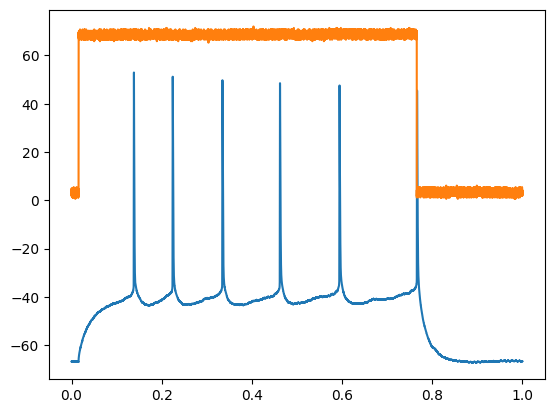

In [42]:
plt.plot(time_stamp, v)
plt.plot(time_stamp, i)

In [43]:
from feature_extractor import SpikeFeatureExtractor, SpikeTrainFeatureExtractor

In [44]:
sfe = SpikeFeatureExtractor(filter=2)
spte = SpikeTrainFeatureExtractor(start=1000, end=8000)


In [46]:
ft = sfe.process(t=time_stamp, v=v, i=i)

In [47]:
ftt = spte.process(t=time_stamp, v=v, i=i, spikes_df=ft)

{'adapt': 0.08611679448115474,
 'latency': -999.8624431221562,
 'isi_cv': 0.2249278957070105,
 'mean_isi': 0.12557627881394068,
 'median_isi': 0.12765638281914093,
 'first_isi': 0.08605430271513576,
 'avg_rate': 0.0}